## Analysis of Outdoor Climbing Routes in Wisconsin

In this analysis I combine a dataset of the climbing crags in Wisconsin with geographic and geologic data. Additionally, I use an API to get the road map distance from Madison Wisconsin to all of the crags in Wisconsin. 

In [1]:
# Import python packages needed
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Choose path to where files are saved on specific computer
computer_path = 'C:/Users/Emily/Google Drive/Data_science/'

### Import climbing crag datasets
Route Data from:
https://www.mountainproject.com/route-guide

In [3]:
# load one dataset
crags = pd.read_csv(os.path.join(computer_path,'Wisc_climbing_analysis/route-finder_0.csv'))
crags.rename(columns={"Avg Stars": "AvgStars"}, inplace=True)
crags.head(2)

,Route,Location,URL,AvgStars,Your Stars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
0,Redfield,Lafayette & Summit > Buildering Sites (statewi...,https://www.mountainproject.com/route/10801358...,2.0,-1,"Trad, TR",5.7 PG13,1,25.0,43.056,-87.88611
1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,https://www.mountainproject.com/route/10775744...,1.8,-1,"Trad, TR, Boulder",5.8 V2+ PG13,1,25.0,43.056,-87.88611


In [4]:
# load all of the datasets and merge into one dataframe; length is in feet
for i in range(1,10):
    df = pd.read_csv(os.path.join(computer_path,'Wisc_climbing_analysis/route-finder_'+ str(i) +'.csv'))
    df.rename(columns={"Avg Stars": "AvgStars"}, inplace=True)
    crags = pd.concat([crags, df], ignore_index=True)
crags.drop(['URL','Your Stars'], inplace=True, axis=1)
crags

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
0,Redfield,Lafayette & Summit > Buildering Sites (statewi...,2.0,"Trad, TR",5.7 PG13,1,25.0,43.05600,-87.88611
1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,1.8,"Trad, TR, Boulder",5.8 V2+ PG13,1,25.0,43.05600,-87.88611
2,V0+ bank flank,Bank Buildering > Buildering Sites (statewide)...,2.0,Trad,5.8- X,1,45.0,43.07812,-89.41169
3,Jizz Chips,"Stoughton, WI > Buildering Sites (statewide) >...",3.0,Trad,5.7,1,30.0,42.91670,-89.21980
4,Conformist,1. Parking Lot Overhang > 2. West Side > High ...,2.0,TR,5.9-,1,30.0,44.15477,-88.29733
...,...,...,...,...,...,...,...,...,...
4612,Rebel,Rebel > Sandstone Area > Devil's Lake Boulderi...,2.0,Boulder,V10-,1,15.0,43.41291,-89.68632
4613,Golden Face,New Sandstone Bouldering > Sandstone Area > De...,-1.0,Boulder,V8+,1,12.0,43.41126,-89.67923
4614,Snow Leopard,4. Snow Leopard > Ice Age Trail > Devil's Lake...,3.7,Boulder,V8,1,15.0,43.42527,-89.69044
4615,Goosebumps,3. Goosebumps > Ice Age Trail > Devil's Lake B...,1.5,Boulder,V8,1,12.0,43.42530,-89.68943


### Use OSRM api to calculate distance to each climbing crag
Documentation for open street map api:
http://project-osrm.org/docs/v5.5.1/api/#route-service

Outputs
- distance: The distance traveled by the route, in float meters.
- duration: The estimated travel time, in float number of seconds.

In [5]:
# Residence in Madison
lat_1 = 43.086402196515245
lon_1 = -89.43798257503916

In [6]:
# load travel distance data from csv into pandas dataframe
dist_data = pd.read_csv(os.path.join(computer_path,'Wisc_climbing_analysis/distance_data.csv')).drop(['Unnamed: 0'], axis=1)
dist_data.rename(columns = {'0':'Travel_time_s', '1':'Travel_time_hms', '2':'Travel_dist_miles', '3':'Nav_success'}, inplace = True)
dist_data 

,Travel_time_s,Travel_time_hms,Travel_dist_miles,Nav_success
0,6467.4,1:47:47.400000,83.171473,Ok
1,6467.4,1:47:47.400000,83.171473,Ok
2,395.8,0:06:35.800000,2.113611,Ok
3,2167.0,0:36:07,21.978869,Ok
4,9444.3,2:37:24.300000,114.434369,Ok
...,...,...,...,...
4612,3339.1,0:55:39.100000,34.391920,Ok
4613,3252.1,0:54:12.100000,34.016470,Ok
4614,3314.3,0:55:14.300000,35.196022,Ok
4615,3310.9,0:55:10.900000,35.157800,Ok


In [7]:
dist_data .Nav_success.unique() # check that all routings ran successfully

array(['Ok'], dtype=object)

#### Combine distance dataframe with crags dataframe

In [8]:
# merge dataframe
crags_data = crags.merge(dist_data, how='left', left_index=True, right_index=True)
crags_data.head(3)

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude,Travel_time_s,Travel_time_hms,Travel_dist_miles,Nav_success
0,Redfield,Lafayette & Summit > Buildering Sites (statewi...,2.0,"Trad, TR",5.7 PG13,1,25.0,43.05600,-87.88611,6467.4,1:47:47.400000,83.171473,Ok
1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,1.8,"Trad, TR, Boulder",5.8 V2+ PG13,1,25.0,43.05600,-87.88611,6467.4,1:47:47.400000,83.171473,Ok
2,V0+ bank flank,Bank Buildering > Buildering Sites (statewide)...,2.0,Trad,5.8- X,1,45.0,43.07812,-89.41169,395.8,0:06:35.800000,2.113611,Ok


In [9]:
crags_data['Travel_time_hrs']=crags_data['Travel_time_s']/60/60

In [10]:
crags_data.drop(['Nav_success'], inplace=True, axis=1) # now drop the Nav success since we have determined that all ran successfully
crags_data.drop(['Travel_time_hms'], inplace=True, axis=1) # drop this column because I decided I don't want it
crags_data.drop(['Travel_time_s'], inplace=True, axis=1) # drop this column because I decided I don't want it

##### Load GIS Map data
Source:
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2018.html

In [11]:
# Import the geopandas library and load geographic data
import geopandas as gpd

# Load the json file with county coordinates
county_Data = gpd.read_file(os.path.join(computer_path,'cb_2018_us_county_5m.geojson'))

# Load the json file with state coordinates
state_Data = gpd.read_file(os.path.join(computer_path,'cb_2018_us_state_5m.geojson'))

# Merge states and counties dataframes
geo_data = pd.merge(county_Data, state_Data[['STATEFP','NAME']], left_on='STATEFP', right_on='STATEFP', how='right').rename(columns={"NAME_x": "County", "NAME_y": "State"})
geo_data.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,State
0,31,009,00835827,0500000US31009,31009,Blaine,06,1840673980,9443894,"MULTIPOLYGON (((-100.26762 42.08615, -100.1676...",Nebraska
1,31,111,00835877,0500000US31111,31111,Lincoln,06,6641072810,28449819,"MULTIPOLYGON (((-101.26969 41.39493, -100.7132...",Nebraska


In [12]:
# Select only counties in Wisconsin
stateToRemove = ['Wisconsin']
geo_data = geo_data[geo_data.State.isin(stateToRemove)]
geo_data.reset_index(inplace=True, drop=True)
geo_data.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,State
0,55,061,01581090,0500000US55061,55061,Kewaunee,06,886951858,1921336271,"MULTIPOLYGON (((-87.76532 44.41450, -87.76238 ...",Wisconsin
1,55,073,01581096,0500000US55073,55073,Marathon,06,4002224342,80462463,"MULTIPOLYGON (((-90.31657 44.95328, -90.31504 ...",Wisconsin


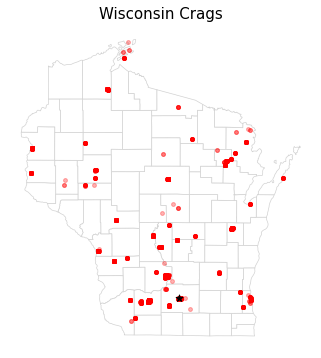

In [13]:
# Make map of 2019 lime data

long = []
lat = []
for i in range(0, len(crags_data)):
    long.append(crags_data['Area Longitude'][i])
    lat.append(crags_data['Area Latitude'][i])
    
fig, ax = plt.subplots(1, figsize=(10,6))
geo_data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax) # plot all states white with gray edges
plt.scatter(long, lat, c ='r', s=15, alpha=.3) # locations of all wisconsin crags8
plt.scatter(lon_1, lat_1, c ='k', s=50, marker='*') # location of Madison
ax.axis('off')
ax.set_title('Wisconsin Crags', fontdict={'fontsize': '15', 'fontweight' : '3'})
plt.show()

In [14]:
# Determine which counties the crags are located within in Wisconsin

from shapely.geometry import Polygon, LineString, Point

cty_data = []

for i in range(0, len(crags)):
    point = Point(long[i], lat[i])
    loc = geo_data.contains(point)
    if len(loc.unique()) > 1:
        index = np.where(loc)[0][0]
        cty = geo_data.iloc[[index]]['County'][:][index]
        cty_id = geo_data.iloc[[index]]['COUNTYFP'][:][index]
        cty_data.append([cty, cty_id])
    else:
        cty_data.append(['NaN', 'NaN']) # assign NaN is crag is not deemed to be within any of the counties
cty_data = pd.DataFrame(cty_data, columns = ['County','Cty_id'])
cty_data.head(2)

,County,Cty_id
0,Milwaukee,079
1,Milwaukee,079


In [15]:
# Add county data to crags dataframe
crags_data = crags_data.merge(cty_data, how='left', left_index=True, right_index=True)
crags_data.head()

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude,Travel_dist_miles,Travel_time_hrs,County,Cty_id
0,Redfield,Lafayette & Summit > Buildering Sites (statewi...,2.0,"Trad, TR",5.7 PG13,1,25.0,43.05600,-87.88611,83.171473,1.796500,Milwaukee,079
1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,1.8,"Trad, TR, Boulder",5.8 V2+ PG13,1,25.0,43.05600,-87.88611,83.171473,1.796500,Milwaukee,079
2,V0+ bank flank,Bank Buildering > Buildering Sites (statewide)...,2.0,Trad,5.8- X,1,45.0,43.07812,-89.41169,2.113611,0.109944,Dane,025
3,Jizz Chips,"Stoughton, WI > Buildering Sites (statewide) >...",3.0,Trad,5.7,1,30.0,42.91670,-89.21980,21.978869,0.601944,Dane,025
4,Conformist,1. Parking Lot Overhang > 2. West Side > High ...,2.0,TR,5.9-,1,30.0,44.15477,-88.29733,114.434369,2.623417,Calumet,015


### Import bedrock geology data
Data source: https://mrdata.usgs.gov/geology/state/state.php?state=WI

In [16]:
# Load the shapefile of the bedrock geology of Wisconsin
geology = gpd.read_file(os.path.join(computer_path,'Wisc_climbing_analysis/bedrock_WI/WI_geol_poly.shp'))
geology.head(3)

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,REF_ID,GENERALIZE,SRC_URL,URL,geometry
0,WI,Agn,Agn;0,WIAgn;0,WI004,"Metamorphic, undifferentiated",https://pubs.usgs.gov/of/1997/of97-455/,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-89.86556 46.14122, -89.89113 46.134..."
1,WI,Agn,Agn;0,WIAgn;0,WI004,"Metamorphic, undifferentiated",https://pubs.usgs.gov/of/1997/of97-455/,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-90.54418 45.91000, -90.54734 45.901..."
2,WI,Agn,Agn;0,WIAgn;0,WI004,"Metamorphic, undifferentiated",https://pubs.usgs.gov/of/1997/of97-455/,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-89.30493 46.15497, -89.25952 46.150..."


In [17]:
# load the related csv file that provides the rock types associated with each unit name
df_units = pd.read_csv(os.path.join(computer_path,'Wisc_climbing_analysis/bedrock_WI/WI_units.csv'), usecols=['unit_link','rocktype1','rocktype2','rocktype3']) #  only load the columns we are interested in
df_units.head(3)

,unit_link,rocktype1,rocktype2,rocktype3
0,WIYws;0,syenite,NaN,NaN
1,WIwater;0,water,NaN,NaN
2,WIOsi;0,dolostone (dolomite),limestone,shale


In [18]:
# merge rock type data with bedrock map data
df_geology = pd.merge(geology, df_units, left_on='UNIT_LINK', right_on='unit_link', how='right').drop(['unit_link'], axis=1)
df_geology.head(3)

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,REF_ID,GENERALIZE,SRC_URL,URL,geometry,rocktype1,rocktype2,rocktype3
0,WI,Yws,Yws;0,WIYws;0,WI004,"Igneous, intrusive",https://pubs.usgs.gov/of/1997/of97-455/,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-89.61169 44.90734, -89.61281 44.892...",syenite,NaN,NaN
1,WI,water,water;0,WIwater;0,WI004,Water,https://pubs.usgs.gov/of/1997/of97-455/,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-88.39372 44.20867, -88.38554 44.207...",water,NaN,NaN
2,WI,water,water;0,WIwater;0,WI004,Water,https://pubs.usgs.gov/of/1997/of97-455/,https://mrdata.usgs.gov/geology/state/sgmc-uni...,"POLYGON ((-89.96124 47.29028, -90.13917 46.999...",water,NaN,NaN


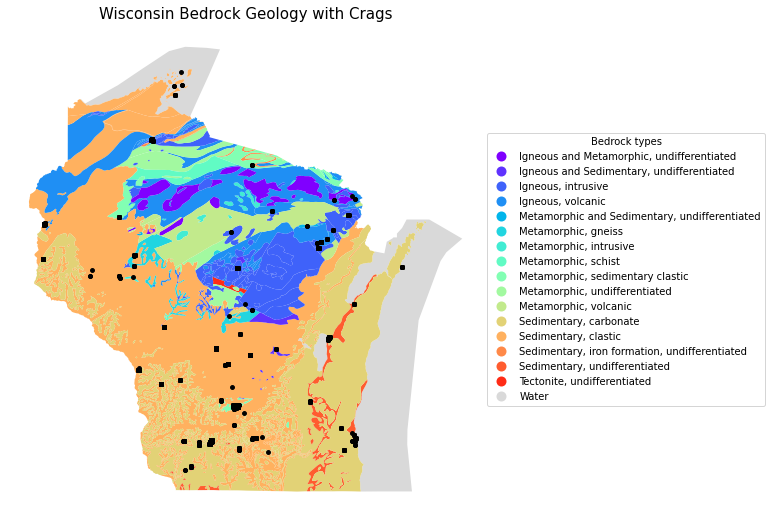

In [19]:
# Make map of 2019 lime data
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# create custom colormap
top = cm.get_cmap('rainbow', 128)
bottom = cm.get_cmap('Greys', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0.25, 1, 1))))
newcmp = ListedColormap(newcolors, name='rainbow_grey')

# crag locations
long = []
lat = []
for i in range(0, len(crags_data)):
    long.append(crags_data['Area Longitude'][i])
    lat.append(crags_data['Area Latitude'][i])

fig, ax = plt.subplots(1, figsize=(15,9))
df_geology.plot(column='GENERALIZE', cmap=newcmp, linewidth=0.7, ax=ax, legend=True, legend_kwds={'loc': 'right', 'bbox_to_anchor':(1.6, 0.5), 'title':'Bedrock types'}) # bedrock geology
plt.scatter(long, lat, c ='k', s=15) # locations of all wisconsin crags8
#plt.scatter(lon_1, lat_1, c ='k', s=50, marker='*') # location of Madison
ax.axis('off')
ax.set_title('Wisconsin Bedrock Geology with Crags', fontdict={'fontsize': '15', 'fontweight' : '3'})
plt.show()

In [20]:
# Determine which counties the crags are located within in Wisconsin

rock_data = []

for i in range(0, len(crags_data)): 
    point = Point(long[i], lat[i])
    loc = df_geology.contains(point)
    if len(loc.unique()) > 1:
        index = np.where(loc)[0][0]
        r1 = df_geology.iloc[[index]]['rocktype1'][:][index]
        r2 = df_geology.iloc[[index]]['rocktype2'][:][index]
        r3 = df_geology.iloc[[index]]['rocktype3'][:][index]
        
        rock_data.append([r1, r2, r3])
    else:
        rock_data.append(['NaN', 'NaN', 'NaN']) # assign NaN is crag is not deemed to be within any of the counties
rock_data = pd.DataFrame(rock_data, columns = ['rocktype1','rocktype2', 'rocktype3'])
rock_data

,rocktype1,rocktype2,rocktype3
0,limestone,shale,NaN
1,limestone,shale,NaN
2,sandstone,dolostone (dolomite),shale
3,sandstone,dolostone (dolomite),shale
4,shale,dolostone (dolomite),NaN
...,...,...,...
4612,sandstone,dolostone (dolomite),shale
4613,quartzite,meta-argillite,NaN
4614,quartzite,meta-argillite,NaN
4615,quartzite,meta-argillite,NaN


In [21]:
# Add county data to crags dataframe
crags_data = crags_data.merge(rock_data, how='left', left_index=True, right_index=True)
crags_data.head()

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude,Travel_dist_miles,Travel_time_hrs,County,Cty_id,rocktype1,rocktype2,rocktype3
0,Redfield,Lafayette & Summit > Buildering Sites (statewi...,2.0,"Trad, TR",5.7 PG13,1,25.0,43.05600,-87.88611,83.171473,1.796500,Milwaukee,079,limestone,shale,NaN
1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,1.8,"Trad, TR, Boulder",5.8 V2+ PG13,1,25.0,43.05600,-87.88611,83.171473,1.796500,Milwaukee,079,limestone,shale,NaN
2,V0+ bank flank,Bank Buildering > Buildering Sites (statewide)...,2.0,Trad,5.8- X,1,45.0,43.07812,-89.41169,2.113611,0.109944,Dane,025,sandstone,dolostone (dolomite),shale
3,Jizz Chips,"Stoughton, WI > Buildering Sites (statewide) >...",3.0,Trad,5.7,1,30.0,42.91670,-89.21980,21.978869,0.601944,Dane,025,sandstone,dolostone (dolomite),shale
4,Conformist,1. Parking Lot Overhang > 2. West Side > High ...,2.0,TR,5.9-,1,30.0,44.15477,-88.29733,114.434369,2.623417,Calumet,015,shale,dolostone (dolomite),NaN


In [22]:
crags_data.drop(['Cty_id'], inplace=True, axis=1) # drop this column because I decided I don't want it

### Now clean up the data
The route type contains whether the route can be climbed in more than one way (Trad, TR, Boulder) so we want to separate these into separate columns of True/False (1/0) for each type of climb. The rating column contains both the grade and sometimes a saftey rating; we want to separate these pieces into separate columns. 

##### separate climbing types into columns

In [23]:
crags_data['Route Type'].unique() # the types of climbs we want are 'Trad', 'TR', 'Boulder', and 'Sport' but some routes can be climbed in more than one way so must be separated

array(['Trad, TR', 'Trad, TR, Boulder', 'Trad', 'TR', 'Sport',
       'Trad, Boulder', 'Sport, TR', 'Trad, Sport', 'TR, Boulder',
       'Trad, Sport, TR', 'Boulder', 'Sport, Aid, Boulder',
       'Boulder, Snow'], dtype=object)

In [24]:
# Create list of whether trad climbing can be done at each route and add to crags dataframe
trad = 'Trad'
trad_locs = []
for i in range(0, len(crags_data)):
    if trad in crags_data['Route Type'][i]:
        trad_locs.append(1) # 1 is true, trad route present
    else:
        trad_locs.append(0) # 0- false; no trad route present

crags_data['Trad'] = trad_locs # add classifation to dataframe

In [25]:
# Create list of whether top rope (TR) climbing can be done at each route and add to crags dataframe
tr = 'TR'
tr_locs = []
for i in range(0, len(crags_data)):
    if tr in crags_data['Route Type'][i]:
        tr_locs.append(1) # 1 is true, trad route present
    else:
        tr_locs.append(0) # 0- false; no trad route present

crags_data['TR'] = tr_locs # add classifation to dataframe

In [26]:
# Create list of whether bouldering can be done at each route and add to crags dataframe
bould = 'Boulder'
bould_locs = []
for i in range(0, len(crags_data)):
    if bould in crags_data['Route Type'][i]:
        bould_locs.append(1) # 1 is true, trad route present
    else:
        bould_locs.append(0) # 0- false; no trad route present

crags_data['Boulder'] = bould_locs # add classifation to dataframe

In [27]:
# Create list of whether sport climbing can be done at each route and add to crags dataframe
sport = 'Sport'
sport_locs = []
for i in range(0, len(crags_data)):
    if sport in crags_data['Route Type'][i]:
        sport_locs.append(1) # 1 is true, trad route present
    else:
        sport_locs.append(0) # 0- false; no trad route present

crags_data['Sport'] = sport_locs # add classifation to dataframe
crags_data.drop(['Route Type'], inplace=True, axis=1) # now drop the route type column since it has now been separated into 4 columns

##### separate climbing grades (difficulty levels) into columns

In [28]:
crags_data['Rating'].unique() # boulding grades, roped grades, and safety rating are all combined and some climbs have ratings for all three so they need to be separated

array(['5.7 PG13', '5.8 V2+ PG13', '5.8- X', '5.7', '5.9-', '5.6', '5.9+',
       '5.9', '5.8+ PG13', '5.9+ PG13', '5.8', '5.8 PG13', '5.8-',
       '5.8 R', '5.7+', '5.9 R', '5.8+', '5.9 V1+', '5.9 PG13',
       '5.6 PG13', '5.9 V0-1 PG13', '5.9+ V0+ R', '5.8- R', '5.6 R',
       '5.7 R', '5.7+ R', '5.9+ R', '5.7+ PG13', '5.8+ R', '5.9 X',
       '5.8 V1 PG13', '5.9 V2- PG13', '5.6 V0', '5.7 V0', '5.10 X',
       '5.12 V3', '5.10d', '5.10a', '5.11', '5.10', '5.10+', '5.11-',
       '5.12- V4', '5.12', '5.11a', '5.11a/b', '5.11c', '5.11+', '5.12-',
       '5.12b', '5.12b/c', '5.13a', '5.13b', '5.10b/c', '5.11b', '5.11d',
       '5.12a', '5.12a/b', '5.10-', '5.10a/b', '5.10c R', '5.10b',
       '5.10 PG13', '5.12+', '5.12c', '5.10c', '5.11c/d', '5.12d PG13',
       '5.11b/c', '5.11a PG13', '5.11- PG13', '5.13c', '5.10c/d', '5.12d',
       '5.13-', '5.13b/c', '5.13d', '5.14c', '5.10b V1+', '5.11 V2',
       '5.12c PG13', '5.13', '5.10b R', '5.12a PG13', '5.10d PG13',
       '5.13b V8', '

In [29]:
## Grade ratings (difficulty of climb)
# 5.6 -5.15 Yosemite decimal scale for Trad, top rope, sport
# V0 - V12 Bouldering difficulty scale; Hueco Scale aka 'V' scale

## Protection Rating (safety)
#G: A safe route that everyone can enjoy.
#PG: Pretty safe, maybe be careful above that one ledge.
#PG-13: Appropriate for most climbers, but avoid if your belayer is sensitive to swearing.
#R: Do not fall off this route in the presence of children under the age of 18 or anyone sensitive to blood or screaming. Really just don’t fall.
#X: Don’t bother with these routes unless you think unnecessarily risking your life provides you with some kind of spiritual experience, or the route is way below your usual onsight level.
# routes that don't have a safety rating are G or PG according to the Mountain Project website

# separate the rating column so that each string (type of rating) now has its own column
ratings = crags_data['Rating'].str.split(' ', expand=True) 
ratings

,0,1,2,3
0,5.7,PG13,None,None
1,5.8,V2+,PG13,None
2,5.8-,X,None,None
3,5.7,None,None,None
4,5.9-,None,None,None
...,...,...,...,...
4612,V10-,None,None,None
4613,V8+,None,None,None
4614,V8,None,None,None
4615,V8,None,None,None


In [30]:
# Create column with climbing grade

# column with Yosemite scale
scale = '5.'
Y_scale = []
for i in range(0, len(crags_data)):
    if scale in crags_data['Rating'][i]:
        if scale in ratings[0][i]:
            Y_scale.append(ratings[0][i])
        elif scale in ratings[1][i]:
            Y_scale.append(ratings[1][i]) 
        elif scale in ratings[2][i]:
            Y_scale.append(ratings[2][i]) 
        elif scale in ratings[3][i]:
            Y_scale.append(ratings[3][i]) 
    else:
        Y_scale.append('NaN') 

crags_data['Yosemite_scale'] = Y_scale # add classifation to dataframe

In [31]:
# Create column with climbing grade

# column with V scale
scale = 'V'
V_scale = []
for i in range(0, len(crags_data)):
    if scale in crags_data['Rating'][i]:
        if scale in ratings[0][i]:
            V_scale.append(ratings[0][i])
        elif scale in ratings[1][i]:
            V_scale.append(ratings[1][i]) 
        elif scale in ratings[2][i]:
            V_scale.append(ratings[2][i]) 
        elif scale in ratings[3][i]:
            V_scale.append(ratings[3][i]) 
    else:
        V_scale.append('NaN') 

crags_data['V_scale'] = V_scale # add classifation to dataframe

In [32]:
# Create column of the safety rating

# column with safety scale
scale = ['X','PG13','R']

S_scale = []
S_conv = []
for i in range(0, len(crags_data)):
    if scale[0] in crags_data['Rating'][i]:
        if scale[0] in ratings[0][i]:
            S_scale.append(ratings[0][i])
        elif scale[0] in ratings[1][i]:
            S_scale.append(ratings[1][i]) 
        elif scale[0] in ratings[2][i]:
            S_scale.append(ratings[2][i]) 
        elif scale[0] in ratings[3][i]:
            S_scale.append(ratings[3][i])
        S_conv.append(3.0)
    elif scale[1] in crags_data['Rating'][i]:
        if scale[1] in ratings[0][i]:
            S_scale.append(ratings[0][i])
        elif scale[1] in ratings[1][i]:
            S_scale.append(ratings[1][i]) 
        elif scale[1] in ratings[2][i]:
            S_scale.append(ratings[2][i]) 
        elif scale[1] in ratings[3][i]:
            S_scale.append(ratings[3][i])
        S_conv.append(1.0)
    elif scale[2] in crags_data['Rating'][i]:
        if scale[2] in ratings[0][i]:
            S_scale.append(ratings[0][i])
        elif scale[2] in ratings[1][i]:
            S_scale.append(ratings[1][i]) 
        elif scale[2] in ratings[2][i]:
            S_scale.append(ratings[2][i]) 
        elif scale[2] in ratings[3][i]:
            S_scale.append(ratings[3][i])
        S_conv.append(2.0)

    else:
        S_scale.append('NaN') 
        S_conv.append(0.0)

crags_data['Safety'] = S_scale # add classifation to dataframe
crags_data['Safety_val'] = S_conv # add classifation to dataframe

In [33]:
set(S_scale) # check to see which values are in the safety list by making list of unique values

{'NaN', 'PG13', 'R', 'X'}

In [34]:
crags_data.drop(['Rating'], inplace=True, axis=1) # now drop the ratings column since it has now been separated into columns for the V, Yosemite and the safety ratings

### Analyse the data
- Now that the data has been cleaned, merged with other data sets, and had columns with mutliple types of information separated, the data can be analyzed

In [35]:
import seaborn as sns
sns.set_theme(style="white", context="talk")

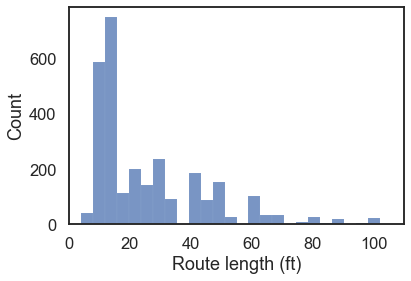

In [36]:
sns.histplot(data=crags_data, x="Length")
plt.xlim([0,110])
plt.xlabel('Route length (ft)')
plt.show()

In [94]:
crags_data.groupby(['Boulder'])['Length'].median()

Boulder
0    40.0
1    12.0
Name: Length, dtype: float64

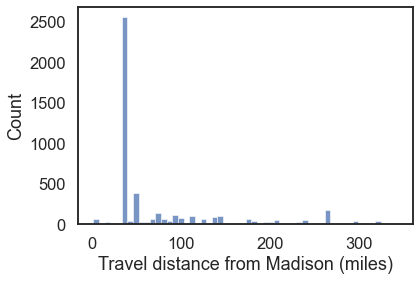

In [37]:
sns.histplot(data=crags_data, x="Travel_dist_miles")
plt.xlabel('Travel distance from Madison (miles)')
plt.show()

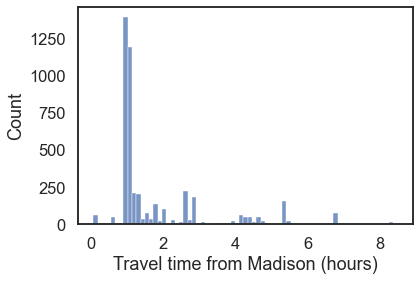

In [38]:
sns.histplot(data=crags_data, x="Travel_time_hrs")
plt.xlabel('Travel time from Madison (hours)')
plt.show()

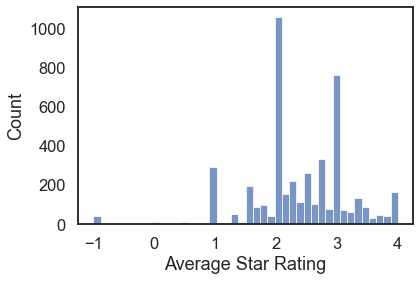

In [39]:
# -1 means no-one has given it a rating, 0 rating means avoid, 4 stars is the maximum rating
sns.histplot(data=crags_data, x="AvgStars")
plt.xlabel('Average Star Rating')
plt.show()

Text(0, 0.5, 'Count')

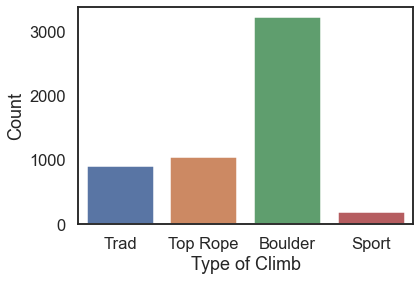

In [40]:
# plot the abundance of the different types of climbing routes
type_counts = [crags_data['Trad'].sum(), crags_data['TR'].sum(), crags_data['Boulder'].sum(), crags_data['Sport'].sum()] # get the total number of each type of climbing route
climb_types = ['Trad', 'Top Rope', 'Boulder', 'Sport']

sns.barplot(x=climb_types, y=type_counts, palette="deep")
plt.xlabel('Type of Climb')
plt.ylabel('Count')

##### look at routes with yosemite climbing grades

In [41]:
# write out the order of the yosemite rating scale
Yosemite_values = ['5.5','5.6', '5.7', '5.7+', '5.8-', '5.8', '5.8+', '5.9-', '5.9', '5.9+', '5.10-', '5.10', '5.10+', '5.10a', '5.10a/b', '5.10b', '5.10b/c', '5.10c', '5.10c/d', '5.10d','5.11-', '5.11', '5.11+', '5.11a', '5.11a/b', '5.11b', '5.11/c', '5.11c', '5.11c/d', '5.11d', '5.12-', '5.12', '5.12+', '5.12a', '5.12a/b', '5.12b', '5.12b/c', '5.12c', '5.12c/d', '5.12d', '5.13-', '5.13', '5.13+', '5.13a', '5.13b', '5.14c']

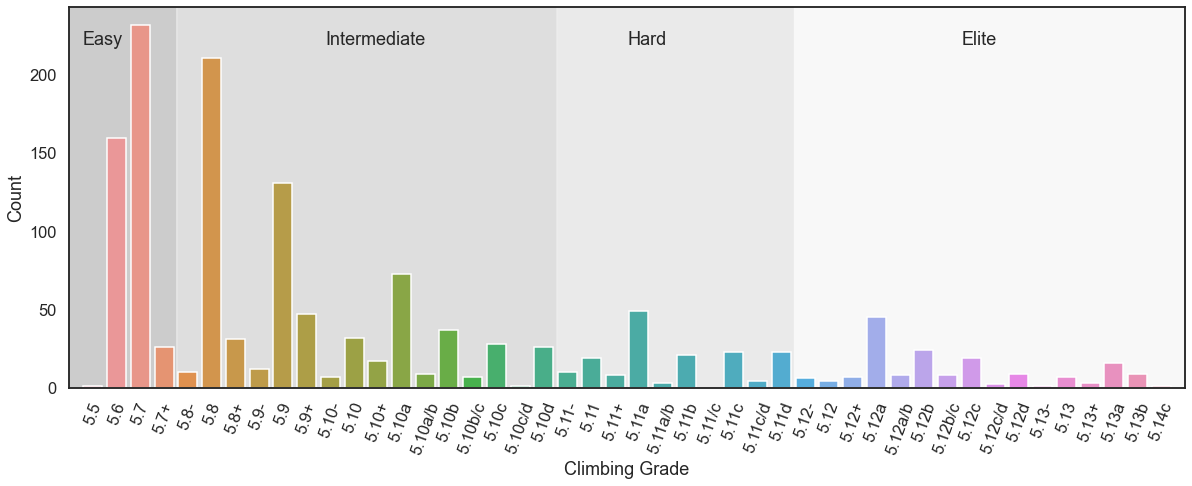

In [42]:
# A 5.0 to 5.7 is considered easy, 5.8 to 5.10 is considered intermediate, 5.11 to 5.12 is hard, and 5.13 to 5.15 is reserved for a very elite few
Y_ratings = crags_data['Yosemite_scale'].value_counts()

fig, ax = plt.subplots(1, figsize=(20,7))
# divide background into different colors based on difficulty range
plt.axvspan(-1, 3.55, facecolor='grey', alpha=0.4)
plt.axvspan(3.55, 19.55, facecolor='grey', alpha=0.26)
plt.axvspan(19.55, 29.53, facecolor='grey', alpha=0.16)
plt.axvspan(29.53, 46, facecolor='grey', alpha=0.05)

# plot the data
sns.barplot(x=Y_ratings[1:].index, y=Y_ratings[1:], order=Yosemite_values)
plt.xlabel('Climbing Grade')
plt.ylabel('Count')
plt.xticks(rotation = 70) # Rotates X-Axis Ticks by 45-degrees

# add labels to each range of difficulty
ax.annotate('Easy', xy=(1, 2), xytext=(0.012, 0.90), textcoords='axes fraction')
ax.annotate('Intermediate', xy=(1, 2), xytext=(0.23, 0.90), textcoords='axes fraction')
ax.annotate('Hard', xy=(1, 2), xytext=(0.5, 0.90), textcoords='axes fraction')
ax.annotate('Elite', xy=(1, 2), xytext=(0.8, 0.90), textcoords='axes fraction')


plt.xlim([-1,46])
plt.show()

In [43]:
# group according to difficulty level
Yosemite_values_all = ['5.2', '5.3', '5.5','5.6', '5.7', '5.7+', '5.8-', '5.8', '5.8+', '5.9-', '5.9', '5.9+', '5.10-', '5.10', '5.10+', '5.10a', '5.10a/b', '5.10b', '5.10b/c', '5.10c', '5.10c/d', '5.10d','5.11-', '5.11', '5.11+', '5.11a', '5.11a/b', '5.11b', '5.11b/c', '5.11/c', '5.11c', '5.11c/d', '5.11d', '5.12-', '5.12', '5.12+', '5.12a', '5.12a/b', '5.12b', '5.12b/c', '5.12c', '5.12c/d', '5.12d', '5.13-', '5.13', '5.13+', '5.13a', '5.13b/c', '5.13b', '5.13c', '5.13d', '5.14c', 'NaN']
Diff_cat = ['Easy','Easy','Easy','Easy','Easy','Easy', 'Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Hard','Hard','Hard','Hard','Hard','Hard','Hard','Hard','Hard','Hard','Hard','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','Elite','NaN']

# group ratings
level = []
for i in crags_data['Yosemite_scale']:
    idx = Yosemite_values_all.index(i)
    level.append(Diff_cat[idx])
crags_data['Y_level'] = level # add classifation to dataframe

In [44]:
# count the number of routes in each level group
levels = ['Easy', 'Intermediate', 'Hard', 'Elite']
level_counts = []
for word in levels: 
    level_counts.append(level.count(word))
level_counts

[421, 679, 166, 176]

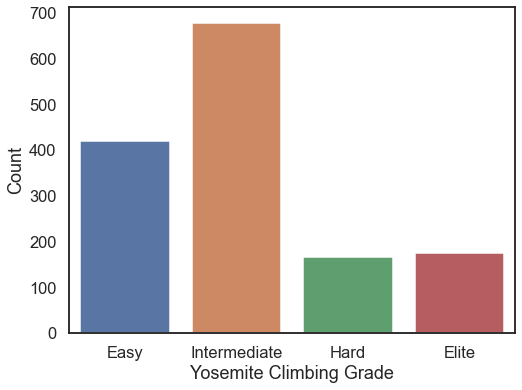

In [45]:
# plot the data
fig, ax = plt.subplots(1, figsize=(8,6))
sns.barplot(x=levels, y=level_counts)
plt.xlabel('Yosemite Climbing Grade')
plt.ylabel('Count')
plt.show()

##### boulding routes

In [46]:
# write out the order of the V rating scale
V_values = ['V-easy', 'V0-','V0', 'V0+', 'V0-1','V1-','V1', 'V1+','V1-2', 'V2-','V2', 'V2+','V2-3','V3-','V3', 'V3+','V3-4', 'V4-','V4', 'V4+','V4-5', 'V5-','V5', 'V5+','V5-6', 'V6-','V6', 'V6+','V6-7', 'V7-','V7', 'V7+','V7-8', 'V8-','V8', 'V8+','V8-9', 'V9-','V9', 'V9+', 'V9-10','V10-','V10', 'V10+', 'V10-11','V11', 'V11+', 'V11-12', 'V13', 'V14']

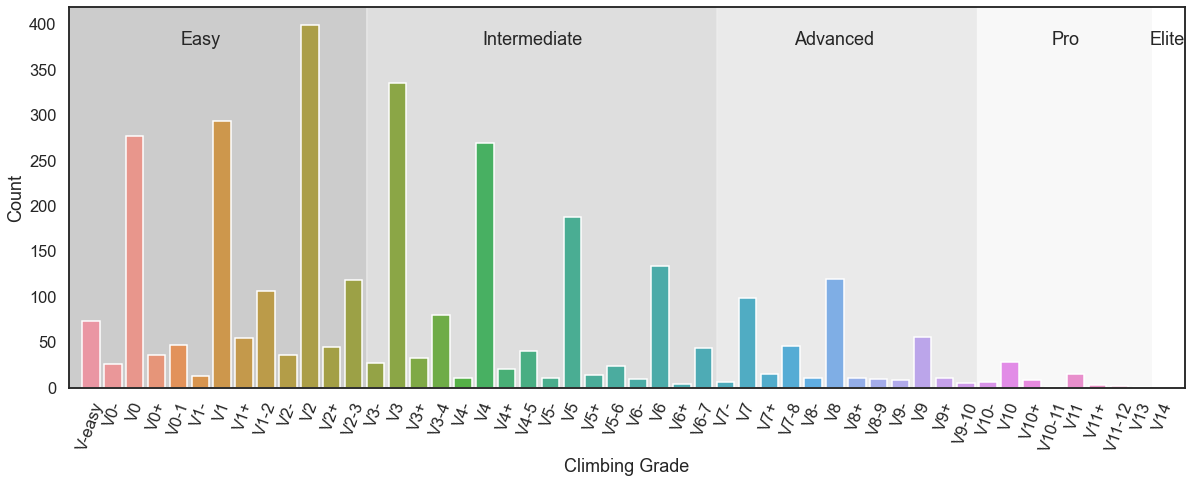

In [47]:
# A V0-V2 is considered easy, V3-V6 is considered intermediate, V7-V9 is advanced, V10-v13 is pro, V14-V16 is elite
V_ratings = crags_data['V_scale'].value_counts()

fig, ax = plt.subplots(1, figsize=(20,7))
# divide background into different colors based on difficulty range
plt.axvspan(-1, 12.6, facecolor='grey', alpha=0.4)
plt.axvspan(12.6, 28.6, facecolor='grey', alpha=0.26)
plt.axvspan(28.6, 40.5, facecolor='grey', alpha=0.16)
plt.axvspan(40.5, 48.5, facecolor='grey', alpha=0.05)

# plot the data
sns.barplot(x=V_ratings[1:].index, y=V_ratings[1:], order=V_values)
plt.xlabel('Climbing Grade')
plt.ylabel('Count')
plt.xticks(rotation = 70) # Rotates X-Axis Ticks by 45-degrees

# add labels to each range of difficulty
ax.annotate('Easy', xy=(1, 2), xytext=(0.1, 0.90), textcoords='axes fraction')
ax.annotate('Intermediate', xy=(1, 2), xytext=(0.37, 0.90), textcoords='axes fraction')
ax.annotate('Advanced', xy=(1, 2), xytext=(0.65, 0.90), textcoords='axes fraction')
ax.annotate('Pro', xy=(1, 2), xytext=(0.88, 0.90), textcoords='axes fraction')
ax.annotate('Elite', xy=(1, 2), xytext=(0.968, 0.90), textcoords='axes fraction')


plt.xlim([-1,50])
plt.show()

In [48]:
# group according to difficulty level
V_values_all = ['V-easy', 'V0-', 'V0', 'V0+', 'V0-1','V1-','V1', 'V1+', 'V1-2', 'V2-','V2', 'V2+','V2-3','V3-','V3', 'V3+','V3-4', 'V4-','V4', 'V4+','V4-5', 'V5-','V5', 'V5+','V5-6', 'V6-','V6', 'V6+','V6-7', 
                'V7-','V7', 'V7+','V7-8', 'V8-','V8', 'V8+','V8-9', 'V9-','V9', 'V9+', 'V9-10','V10-','V10', 'V10+', 'V10-11','V11', 'V11+', 'V11-12', 'V13', 'V14', 'NaN']
Diff_Vcat = ['Easy','Easy','Easy','Easy','Easy','Easy','Easy','Easy','Easy','Easy','Easy','Easy','Easy','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate',
             'Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Intermediate','Advanced','Advanced','Advanced','Advanced','Advanced',
             'Advanced','Advanced','Advanced','Advanced','Advanced','Advanced','Advanced','Pro', 'Pro', 'Pro', 'Pro', 'Pro', 'Pro', 'Pro', 'Pro', 'Elite','NaN']

# group ratings
V_level = []
for i in crags_data['V_scale']:
    idx = V_values_all.index(i)
    V_level.append(Diff_Vcat[idx])
crags_data['V_level'] = V_level

In [49]:
# count the number of routes in each level group
V_levels = ['Easy', 'Intermediate', 'Advanced', 'Pro', 'Elite']
V_level_counts = []
for word in V_levels: 
    V_level_counts.append(V_level.count(word))
V_level_counts

[1523, 1241, 394, 64, 1]

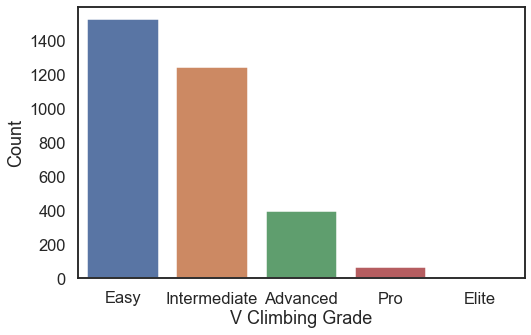

In [50]:
# plot the data
fig, ax = plt.subplots(1, figsize=(8,5))
sns.barplot(x=V_levels, y=V_level_counts)
plt.xlabel('V Climbing Grade')
plt.ylabel('Count')
plt.show()

### Assess star rating by rock type

In [51]:
# Assign a numeric value to each grade
Yosemite_values_all = ['5.2', '5.3', '5.5','5.6', '5.7', '5.7+', '5.8-', '5.8', '5.8+', '5.9-', '5.9', '5.9+', '5.10-', '5.10', '5.10+', '5.10a', '5.10a/b', '5.10b', '5.10b/c', '5.10c', '5.10c/d', '5.10d',
                       '5.11-', '5.11', '5.11+', '5.11a', '5.11a/b', '5.11b', '5.11b/c', '5.11/c', '5.11c', '5.11c/d', '5.11d', '5.12-', '5.12', '5.12+', '5.12a', '5.12a/b', '5.12b', '5.12b/c', '5.12c', 
                       '5.12c/d', '5.12d', '5.13-', '5.13', '5.13+', '5.13a', '5.13b/c', '5.13b', '5.13c', '5.13d', '5.14c', 'NaN']
#Y_v = [0, 1, 2, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 'NaN'] 
Y_v = [0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,-9999]

# convert yosemite scale to interger values
Y_conv = []
for i in crags_data['Yosemite_scale']:
    idx = Yosemite_values_all.index(i)
    Y_conv.append(Y_v[idx])
crags_data['Y_conv'] = Y_conv

In [52]:
# Assign a numeric value to each grade
V_values_all = ['V-easy', 'V0-', 'V0', 'V0+', 'V0-1','V1-','V1', 'V1+', 'V1-2', 'V2-','V2', 'V2+','V2-3','V3-','V3', 'V3+','V3-4', 'V4-','V4', 'V4+','V4-5', 'V5-','V5', 'V5+','V5-6', 'V6-','V6', 'V6+','V6-7', 
                'V7-','V7', 'V7+','V7-8', 'V8-','V8', 'V8+','V8-9', 'V9-','V9', 'V9+', 'V9-10','V10-','V10', 'V10+', 'V10-11','V11', 'V11+', 'V11-12', 'V13', 'V14', 'NaN']

V_v = [0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 13, 14, 'NaN'] 

# convert V bouldering scale to interger values
V_conv = []
for i in crags_data['V_scale']:
    idx = V_values_all.index(i)
    V_conv.append(V_v[idx])
crags_data['V_conv'] = V_conv

In [53]:
crags_data['AvgStars'].unique() # -1 means no-one has given it a rating, 0 rating means avoid, 4 stars is the maximum rating

array([ 2. ,  1.8,  3. ,  2.3,  1.5,  2.7,  1.3,  2.5,  2.2,  1.7,  2.1,
        3.1,  3.2,  2.9,  2.8,  2.4,  0. ,  0.6,  1.9,  3.6,  1.6,  3.4,
        1. ,  2.6,  0.4,  3.3,  0.8,  0.7,  3.7, -1. ,  4. ,  3.5,  3.8,
        1.1,  0.5,  1.4,  1.2,  3.9,  0.3,  0.9,  0.2])

In [54]:
# Make a dataframe where the rock type is converted to numeric dummy values
crags_data.drop(crags_data[crags_data.rocktype1 == 'water'].index, inplace=True)
crags_data.reset_index(inplace=True)
rock_type = pd.get_dummies(crags_data['rocktype1']).drop(['NaN'], axis=1)
#rock_type

In [55]:
count= 1
rock_types = rock_type['arkose'].rename("base")
for i in rock_type.columns: 
    rock_types =  pd.concat([rock_types, rock_type[i] * count], axis=1) 
    count = count+1
rock_types.drop(['base'],axis=1, inplace=True)
Rock_types = rock_types.sum(axis=1).rename("Rock_types")
#Rock_types

In [56]:
crags_data = pd.concat([crags_data, Rock_types], axis=1)
#crags_data

In [57]:
# Find all the routes that have been given a star ranking (reviewed)
# -1 means no-one has given it a rating, 0 rating means avoid = bad, 4 stars is the maximum/best rating
Reviewed = crags_data.loc[crags_data['AvgStars'] > -1]

# boulder routes
Reviewed_boulders = Reviewed.loc[Reviewed['Boulder'] == 1].drop(['Yosemite_scale','Y_level','Y_conv', 'Trad', 'Sport', 'TR'], axis = 1)
Reviewed_boulders = Reviewed_boulders.dropna(subset = ['Length'])
Reviewed_boulders.head(2)

,index,Route,Location,AvgStars,Pitches,Length,Area Latitude,Area Longitude,Travel_dist_miles,Travel_time_hrs,...,rocktype1,rocktype2,rocktype3,Boulder,V_scale,Safety,Safety_val,V_level,V_conv,Rock_types
1,1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,1.8,1,25.0,43.05600,-87.88611,83.171473,1.796500,...,limestone,shale,NaN,1,V2+,PG13,1.0,Easy,2,9
38,38,Hydroponics,01. Coyote Tower > Necedah (Petenwell Rock) > ...,3.1,1,50.0,44.04411,-90.01938,90.754755,2.011444,...,sandstone,dolostone (dolomite),shale,1,V1+,NaN,0.0,Easy,1,12


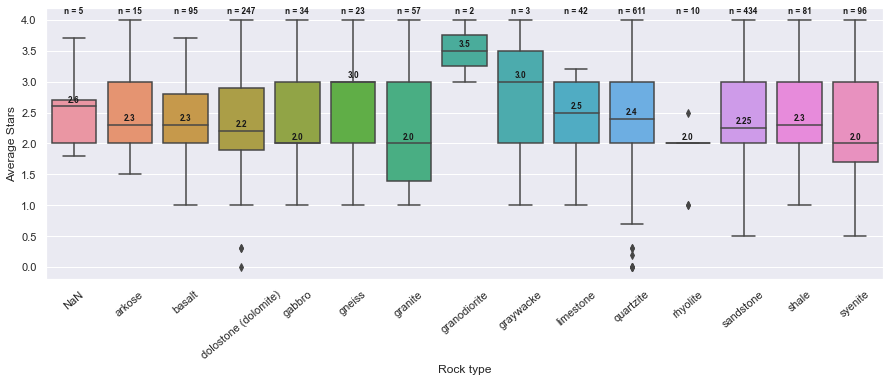

In [89]:
# plot the data
sns.set(rc = {'figure.figsize':(15,8)})
medians = Reviewed_boulders.groupby(['rocktype1'])['AvgStars'].median()
vertical_offset = Reviewed_boulders['AvgStars'].median() * 0.03 # offset from median for display

n_crags = []
for i in pd.DataFrame(medians).index:
    n_crags.append(len(Reviewed_boulders['AvgStars'].loc[Reviewed_boulders['rocktype1']==i]))
    
fig, ax = plt.subplots(1, figsize=(15,5))
box_plot = sns.boxplot(data=Reviewed_boulders, x='rocktype1', y='AvgStars', order=pd.DataFrame(medians).index)
plt.xlabel('Rock type')
plt.ylabel('Average Stars')
plt.xticks(rotation = 40) # Rotates X-Axis Ticks by 45-degrees

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick]+vertical_offset, medians[xtick], horizontalalignment='center',size='x-small',color='k',weight='bold') # add annotation with the median values
    box_plot.text(xtick, 4.1, 'n = {:.0f}'.format(n_crags[xtick]), horizontalalignment='center',size='x-small',color='k',weight='bold') # add annotation with the number of crags with each rock type

plt.show()

#### Boulding routes anova

In [59]:
# Make a list for each rock type containing all the star ratings for that rock type
types = Reviewed_boulders['rocktype1'].unique()

dct = {}
for i in types:
    dct['%s' % i] = [Reviewed_boulders['AvgStars'].loc[Reviewed_boulders['rocktype1']==i]]

In [60]:
# Perform ANOVA on rock types and star rating
from scipy.stats import f_oneway
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = f_oneway(np.asarray(dct[types[0]][0]), np.asarray(dct[types[1]][0]), np.asarray(dct[types[2]][0]), np.asarray(dct[types[3]][0]), 
                          np.asarray(dct[types[4]][0]), np.asarray(dct[types[5]][0]), np.asarray(dct[types[6]][0]), np.asarray(dct[types[7]][0]), 
                          np.asarray(dct[types[8]][0]), np.asarray(dct[types[9]][0]), np.asarray(dct[types[10]][0]), np.asarray(dct[types[11]][0]), 
                          np.asarray(dct[types[12]][0]), np.asarray(dct[types[13]][0]), np.asarray(dct[types[14]][0]))
print(fvalue, pvalue)

2.4663512094021027 0.0018587650316441704


In [102]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('AvgStars ~ C(rocktype1)', data=Reviewed_boulders).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(rocktype1),19.573529,13.0,2.628432,0.001227
Residual,994.440391,1736.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences in the star rating among the rock types.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=Reviewed_boulders['AvgStars'], groups=Reviewed_boulders['rocktype1'], alpha=0.1)

#display results
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.10               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
                 NaN               arkose  -0.1533    1.0 -1.3895  1.0828  False
                 NaN               basalt  -0.2053    1.0 -1.3036  0.8931  False
                 NaN dolostone (dolomite)  -0.2851    1.0 -1.3664  0.7962  False
                 NaN               gabbro  -0.1924    1.0 -1.3389  0.9542  False
                 NaN               gneiss   0.2009    1.0 -0.9803   1.382  False
                 NaN              granite  -0.4126  0.998 -1.5291  0.7039  False
                 NaN         granodiorite     0.94 0.9784 -1.0628  2.9428  False
                 NaN            graywacke   0.1067    1.0 -1.6415  1.8548  False
                 NaN            limestone   -0.129    1.0 -1.2615  1.0034  False
                 NaN        

#### Climbing routes ANOVA (TR, Trad, Sport)

In [63]:
# non bouldering routes
Reviewed_climbs = Reviewed.loc[Reviewed['TR'] + Reviewed['Sport'] + Reviewed['Trad'] > 0].drop(['V_scale','V_level','V_conv', 'Boulder'], axis = 1)
Reviewed_climbs = Reviewed_climbs.dropna(subset = ['Length'])
Reviewed_climbs = Reviewed_climbs[Reviewed_climbs['Y_conv'] > -1]
Reviewed_climbs.head(2)

,index,Route,Location,AvgStars,Pitches,Length,Area Latitude,Area Longitude,Travel_dist_miles,Travel_time_hrs,...,rocktype3,Trad,TR,Sport,Yosemite_scale,Safety,Safety_val,Y_level,Y_conv,Rock_types
0,0,Redfield,Lafayette & Summit > Buildering Sites (statewi...,2.0,1,25.0,43.056,-87.88611,83.171473,1.7965,...,NaN,1,1,0,5.7,PG13,1.0,Easy,0,9
1,1,Is the Route Included in the Price of the Condo?,Lafayette & Summit > Buildering Sites (statewi...,1.8,1,25.0,43.056,-87.88611,83.171473,1.7965,...,NaN,1,1,0,5.8,PG13,1.0,Intermediate,1,9


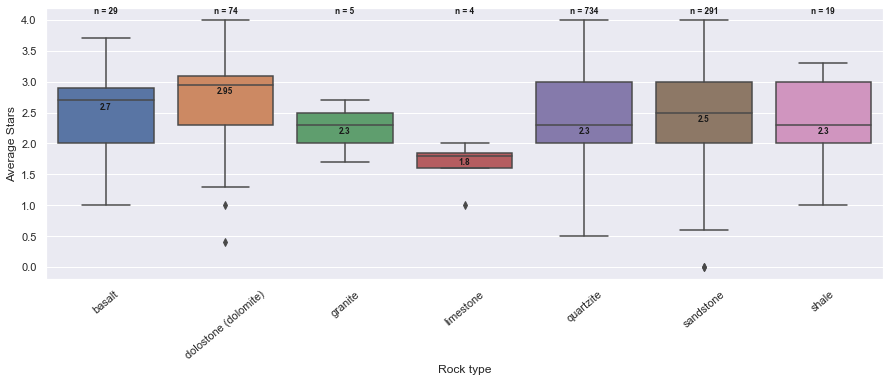

In [90]:
# plot the data
medians = Reviewed_climbs.groupby(['rocktype1'])['AvgStars'].median()
vertical_offset = Reviewed_climbs['AvgStars'].median() * -0.06 # offset from median for display

n_crags = []
for i in pd.DataFrame(medians).index:
    n_crags.append(len(Reviewed_climbs['AvgStars'].loc[Reviewed_climbs['rocktype1']==i]))
    
fig, ax = plt.subplots(1, figsize=(15,5))
box_plot2 = sns.boxplot(data=Reviewed_climbs, x='rocktype1', y='AvgStars', order=pd.DataFrame(medians).index)
plt.xlabel('Rock type')
plt.ylabel('Average Stars')
plt.xticks(rotation = 40) # Rotates X-Axis Ticks by 45-degrees

for xtick in box_plot2.get_xticks():
    box_plot2.text(xtick, medians[xtick]+vertical_offset, medians[xtick], horizontalalignment='center',size='x-small',color='k',weight='bold') # add annotation with the median values
    box_plot2.text(xtick, 4.1, 'n = {:.0f}'.format(n_crags[xtick]), horizontalalignment='center',size='x-small',color='k',weight='bold') # add annotation with the number of crags with each rock type

plt.show()

In [65]:
# Make a list for each rock type containing all the star ratings for that rock type
types = Reviewed_climbs['rocktype1'].unique()

dct = {}
for i in types:
    dct['%s' % i] = [Reviewed_climbs['AvgStars'].loc[Reviewed_climbs['rocktype1']==i]]

In [66]:
Reviewed_climbs['rocktype1'].unique()

array(['limestone', 'sandstone', 'shale', 'dolostone (dolomite)',
       'basalt', 'granite', 'quartzite'], dtype=object)

In [67]:
# Perform ANOVA on rock types and star rating
from scipy.stats import f_oneway
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = f_oneway(np.asarray(dct[types[0]][0]), np.asarray(dct[types[1]][0]), np.asarray(dct[types[2]][0]), np.asarray(dct[types[3]][0]), 
                          np.asarray(dct[types[4]][0]), np.asarray(dct[types[5]][0]), np.asarray(dct[types[6]][0]))
print(fvalue, pvalue)

4.344138223521923 0.0002406744770184987


In [68]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('AvgStars ~ C(rocktype1)', data=Reviewed_climbs).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(rocktype1),13.747884,6.0,4.344138,0.000241
Residual,606.039616,1149.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences in the star rating among the rock types.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=Reviewed_climbs['AvgStars'], groups=Reviewed_climbs['rocktype1'], alpha=0.05)

#display results
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
              basalt dolostone (dolomite)   0.1828 0.9126 -0.2871  0.6527  False
              basalt              granite  -0.3083  0.976  -1.347  0.7304  False
              basalt            limestone  -0.8983 0.2357 -2.0424  0.2458  False
              basalt            quartzite  -0.1981 0.7794 -0.6043   0.208  False
              basalt            sandstone  -0.0984 0.9928 -0.5161  0.3193  False
              basalt                shale  -0.2114  0.957 -0.8445  0.4217  False
dolostone (dolomite)              granite  -0.4911 0.7666 -1.4823  0.5001  False
dolostone (dolomite)            limestone  -1.0811 0.0582 -2.1822    0.02  False
dolostone (dolomite)            quartzite  -0.3809 0.0004 -0.6426 -0.1193   True
dolostone (dolomite)        

### Bouldering decision tree analysis

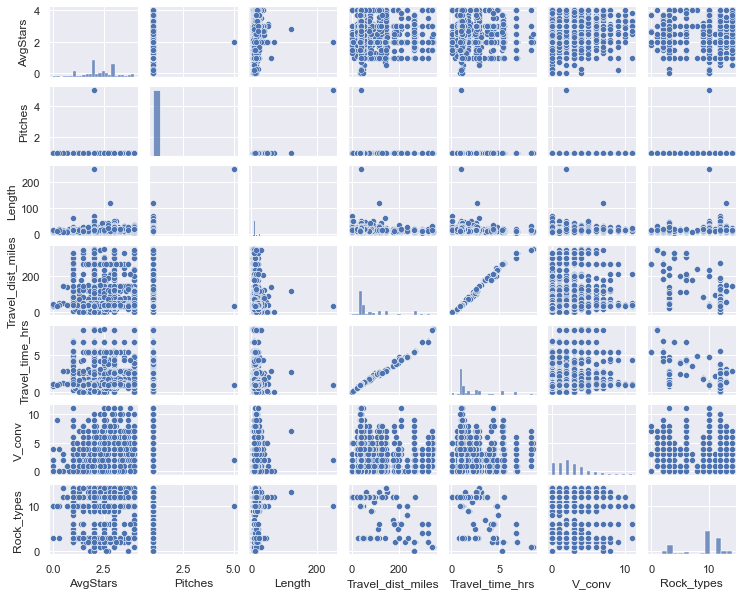

In [70]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(Reviewed_boulders, height=1.2, aspect=1.25, vars=['AvgStars','Pitches','Length','Travel_dist_miles', 'Travel_time_hrs','V_conv','Rock_types'])

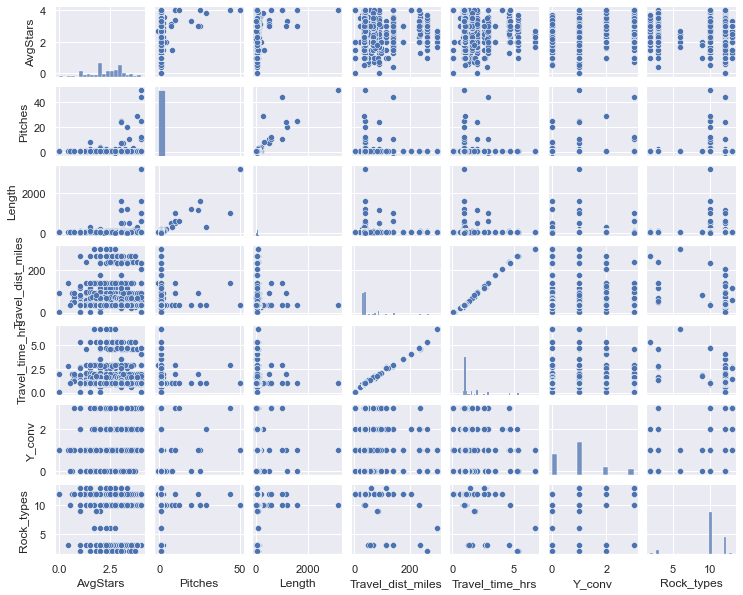

In [71]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(Reviewed_climbs, height=1.2, aspect=1.25, vars=['AvgStars','Pitches','Length','Travel_dist_miles', 'Travel_time_hrs','Y_conv','Rock_types'])

In [72]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<AxesSubplot:>

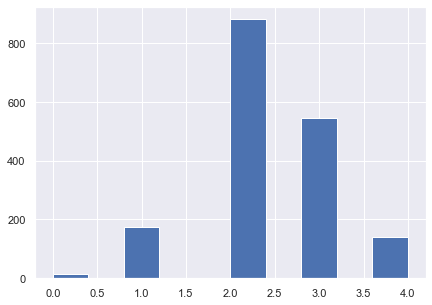

In [73]:
#split dataset in features and target variable
#feature_cols = ['Length','Safety_val','V_conv','Rock_types', 'arkose', 'basalt', 'dolostone (dolomite)', 'gabbro', 'gneiss', 'granite', 'granodiorite', 'graywacke', 'limestone','quartzite','rhyolite','sandstone','shale','syenite']
feature_cols = ['Length','Safety_val','V_conv','Rock_types']

X = Reviewed_boulders[feature_cols] # Features
y = Reviewed_boulders['AvgStars'].round(0).astype(int) # Target variable
sns.set(rc = {'figure.figsize':(7,5)})
y.hist()

In [74]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [75]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier() # 0.516
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6) # 0.533
#clf = DecisionTreeClassifier(max_depth=7) # 0.524

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5294117647058824


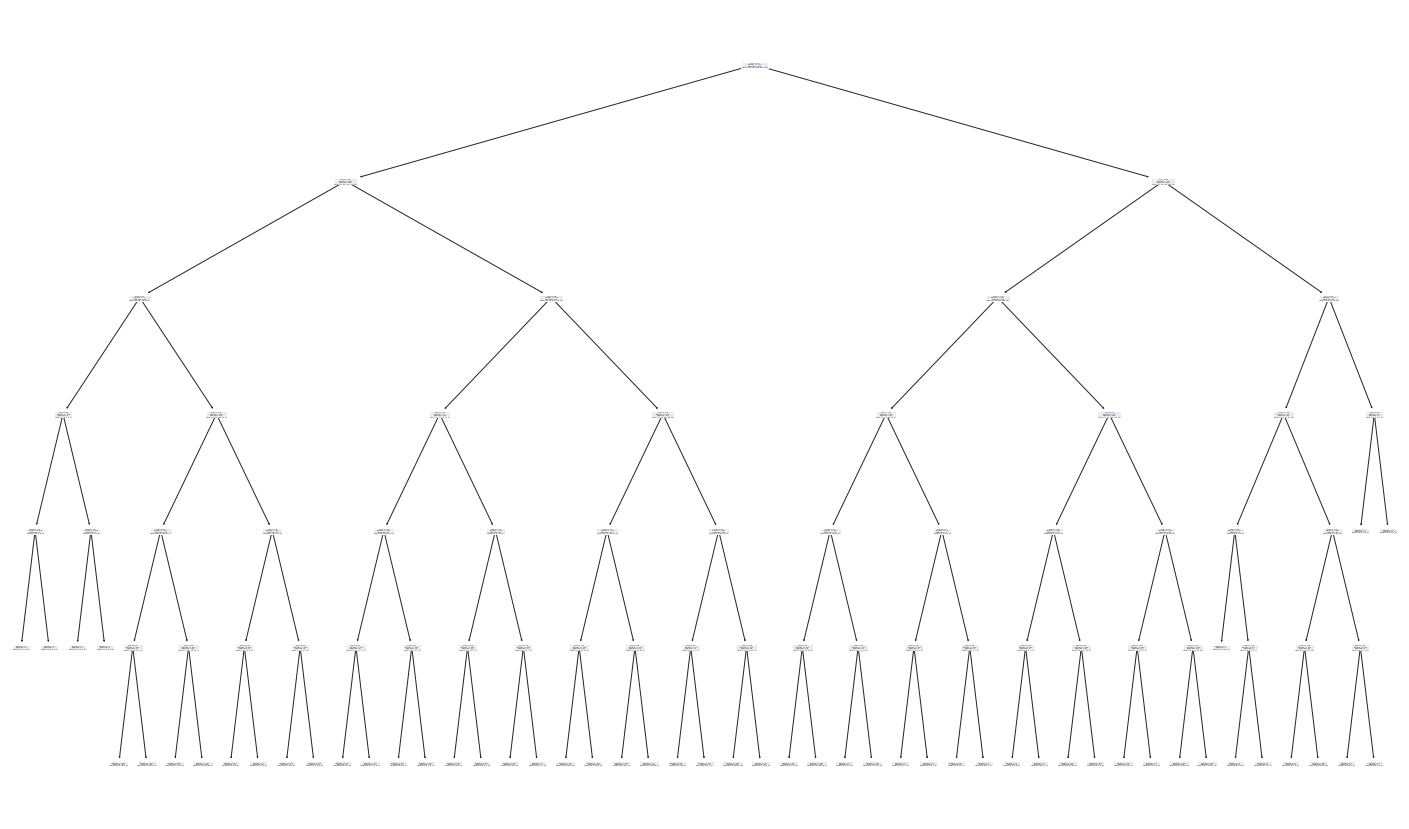

In [77]:
from sklearn import tree
fig, ax = plt.subplots(1, figsize=(25, 15))
tree.plot_tree(clf)
plt.show()

### Climbing decision tree analysis

In [78]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<AxesSubplot:>

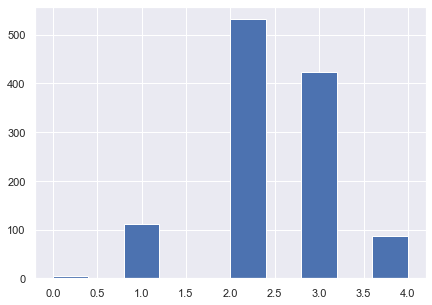

In [79]:
#split dataset in features and target variable
#feature_cols = ['Length', 'Safety_val','Y_conv']
#feature_cols = ['Length','Safety_val','Y_conv','Rock_types', 'arkose', 'basalt', 'dolostone (dolomite)', 'gabbro', 'gneiss', 'granite', 'granodiorite', 'graywacke', 'limestone','quartzite','rhyolite','sandstone','shale','syenite']
feature_cols = ['Length','Safety_val','Y_conv','Rock_types']

X = Reviewed_climbs[feature_cols] # Features
y = Reviewed_climbs['AvgStars'].round(0).astype(int) # Target variable
y.hist()

In [80]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [81]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier() # 0.4928
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) # 0.510
clf = DecisionTreeClassifier(max_depth=2) # 0.510

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5100864553314121


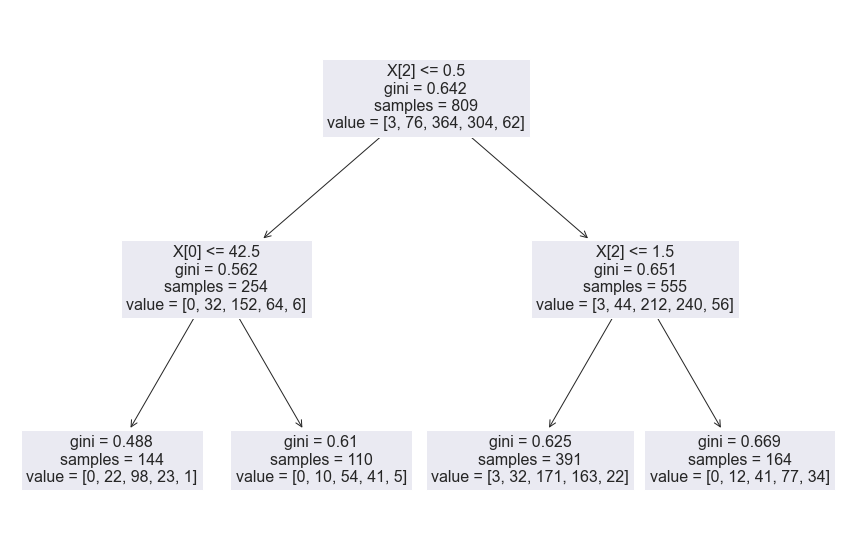

In [83]:
from sklearn import tree
fig, ax = plt.subplots(1, figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

With the data we have, we cannot accurately predict the rating that either bouldering or climbing (TR, trad, sport) routes will receive based on their length, rock type, difficulty rating, or safety rating, since the decision tree only accurately predicts the number of stars that the bouldering and climbing routes recieve 53% and 51.0%, respectively. This means there is some other factor that affects how climbers rate the routes, such as how interesting or unique the climb may be. To capture what this missing influence might be, written reviews of the climbs could be processed for words that may indicate why climbers chose to rate the climbs the way they did.

### Find crags with good routes for me

In [104]:
ideal_locs = crags_data.loc[((crags_data['Y_conv']<2) & (crags_data['Sport']==1) & (crags_data['Travel_time_hrs']<3))]['Location'].value_counts()
ideal_locs

Hillbilly Routes > Hillbilly Hollow > Central > Wisconsin                                        13
Adidas Wall > Grandad Bluff > Central > Wisconsin                                                11
2. Qual Wall > Group Camps > Governor Dodge State Park > South > Wisconsin                        6
George's Point > Grandad Bluff > Central > Wisconsin                                              5
Bling Bling Wall > Grandad Bluff > Central > Wisconsin                                            4
The Point > Grandad Bluff > Central > Wisconsin                                                   4
10. Above Anthrax > Necedah (Petenwell Rock) > Central > Wisconsin                                4
Mushroom Wall > Grandad Bluff > Central > Wisconsin                                               4
09. The Brig > Necedah (Petenwell Rock) > Central > Wisconsin                                     3
06. Hell Wall (aka Quarry Wall) > Necedah (Petenwell Rock) > Central > Wisconsin                  3


In [85]:
crags.loc[((crags_data['Y_conv']<2) & (crags_data['Sport']==1) & (crags['Location'] == ideal_locs.index[0]))]

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
62,Sy-STEM of a Hollow,Hillbilly Routes > Hillbilly Hollow > Central ...,2.0,"Sport, TR",5.7,1,50.0,43.9763,-89.5005
64,End of the Innocence,Hillbilly Routes > Hillbilly Hollow > Central ...,2.6,Sport,5.7+,1,55.0,43.9763,-89.5005
65,Curse of the Drill,Hillbilly Routes > Hillbilly Hollow > Central ...,2.8,Sport,5.7+,1,55.0,43.9763,-89.5005
67,Swiss Cheese,Hillbilly Routes > Hillbilly Hollow > Central ...,2.8,"Sport, TR",5.8,1,40.0,43.9763,-89.5005
69,End of the Innocence variation,Hillbilly Routes > Hillbilly Hollow > Central ...,2.6,"Sport, TR",5.8+,1,55.0,43.9763,-89.5005
73,PWB Arete,Hillbilly Routes > Hillbilly Hollow > Central ...,3.1,Sport,5.9,1,NaN,43.9763,-89.5005
74,Backseat B-lay,Hillbilly Routes > Hillbilly Hollow > Central ...,2.7,Sport,5.9,1,40.0,43.9763,-89.5005
75,Barnyard,Hillbilly Routes > Hillbilly Hollow > Central ...,1.7,"Sport, TR",5.9+,1,40.0,43.9763,-89.5005
910,High School Virgin,Hillbilly Routes > Hillbilly Hollow > Central ...,2.2,Sport,5.10a,1,45.0,43.9763,-89.5005
912,Sunset Ascent,Hillbilly Routes > Hillbilly Hollow > Central ...,2.4,Sport,5.10a,1,40.0,43.9763,-89.5005


In [86]:
crags.loc[((crags_data['Y_conv']<2) & (crags_data['Sport']==1) & (crags['Location'] == ideal_locs.index[1]))]

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
80,Randalls One Trick Pony,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.8,Sport,5.8+,1,45.0,43.81095,-91.20564
81,Catfished,Adidas Wall > Grandad Bluff > Central > Wisconsin,1.9,Sport,5.8+,1,40.0,43.81095,-91.20564
82,Lather Boy,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.5,Sport,5.9-,1,45.0,43.81095,-91.20564
83,A.D.I.D.A.S.,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.6,Sport,5.9,1,55.0,43.81095,-91.20564
945,Yeti Traverse,Adidas Wall > Grandad Bluff > Central > Wisconsin,1.5,Sport,5.10a,1,60.0,43.81095,-91.20564
946,Wehrmacht Stable,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.8,Sport,5.10b,1,45.0,43.81095,-91.20564
947,Let Your Pimpness Shine,Adidas Wall > Grandad Bluff > Central > Wisconsin,3.2,Sport,5.10b,1,45.0,43.81095,-91.20564
948,Freehander,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.6,Sport,5.10b,1,45.0,43.81095,-91.20564
949,Golden Shower of Hits,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.3,Sport,5.10c,1,50.0,43.81095,-91.20564
950,Everything Zen,Adidas Wall > Grandad Bluff > Central > Wisconsin,2.8,Sport,5.10c,1,45.0,43.81095,-91.20564


In [87]:
crags.loc[((crags_data['Y_conv']<2) & (crags_data['Sport']==1) & (crags['Location'] == ideal_locs.index[2]))]

,Route,Location,AvgStars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
163,Tramadol,2. Qual Wall > Group Camps > Governor Dodge St...,2.6,Sport,5.8,1,75.0,43.03993,-90.10516
166,Slab Me Harder,2. Qual Wall > Group Camps > Governor Dodge St...,2.2,Sport,5.9+,1,NaN,43.03993,-90.10516
167,Slab Right,2. Qual Wall > Group Camps > Governor Dodge St...,2.1,Sport,5.9+,1,50.0,43.03993,-90.10516
1052,Leftwing,2. Qual Wall > Group Camps > Governor Dodge St...,2.4,Sport,5.10a,1,50.0,43.03993,-90.10516
1053,Sobriety Test,2. Qual Wall > Group Camps > Governor Dodge St...,2.8,Sport,5.10c,1,NaN,43.03993,-90.10516
1054,Quail Stew,2. Qual Wall > Group Camps > Governor Dodge St...,2.4,"Trad, Sport",5.10+,1,50.0,43.03993,-90.10516


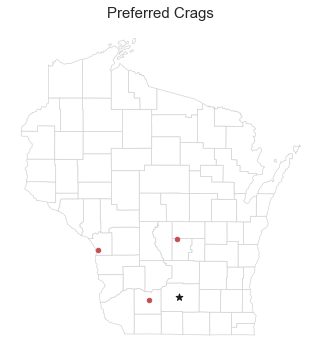

In [88]:
# Make map of 2019 lime data

long = []
lat = []
for i in range(0, len(crags_data)):
    long.append(crags_data['Area Longitude'][i])
    lat.append(crags_data['Area Latitude'][i])
    
fig, ax = plt.subplots(1, figsize=(10,6))
geo_data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax) # plot all states white with gray edges
plt.scatter(crags['Area Longitude'][80], crags['Area Latitude'][80], c ='r', s=20) # locations of all wisconsin crags8
plt.scatter(crags['Area Longitude'][62], crags['Area Latitude'][62], c ='r', s=20) # locations of all wisconsin crags8
plt.scatter(crags['Area Longitude'][163], crags['Area Latitude'][163], c ='r', s=20) # locations of all wisconsin crags8
plt.scatter(lon_1, lat_1, c ='k', s=50, marker='*') # location of Madison
ax.axis('off')
ax.set_title('Preferred Crags', fontdict={'fontsize': '15', 'fontweight' : '3'})
plt.show()